## Fetal Health Classification Analysis

**1. Introduction**

**Source of Data**
Dataset: Fetal Health Classification
Link: https://www.kaggle.com/code/karnikakapoor/fetal-health-classification

**Problem Statement**
Fetal health classification is critical in obstetrics to ensure proper care and intervention during pregnancy. The goal of this analysis is to classify the health status of a fetus into one of three categories:
- Normal
- Suspect
- Pathological
Using clinical features such as fetal heart rate patterns and other indicators, we aim to build a machine learning model that accurately predicts these categories.

**Objective**
1. Understand the structure of the dataset and its key features.
2. Explore the data to gain insights into the relationships between features and fetal health.
3. Preprocess the data to ensure it is clean and suitable for modeling.
4. Build and evaluate classification models to predict fetal health accurately.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from pycaret.classification import *

In [3]:
# Load the Dataset
data = pd.read_csv('fetal_health.csv')


In [4]:
# **Exploring the Dataset**
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [5]:
# Check for missing values and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [6]:
# Summary statistics
data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


<Axes: xlabel='fetal_health', ylabel='count'>

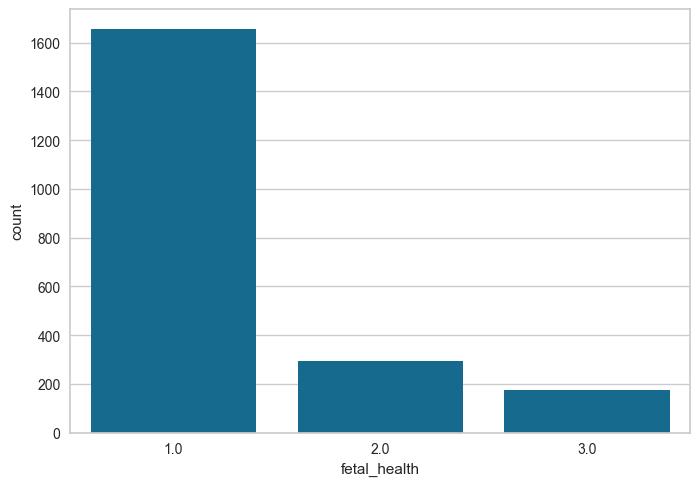

In [8]:
sns.countplot(data= data, x="fetal_health")

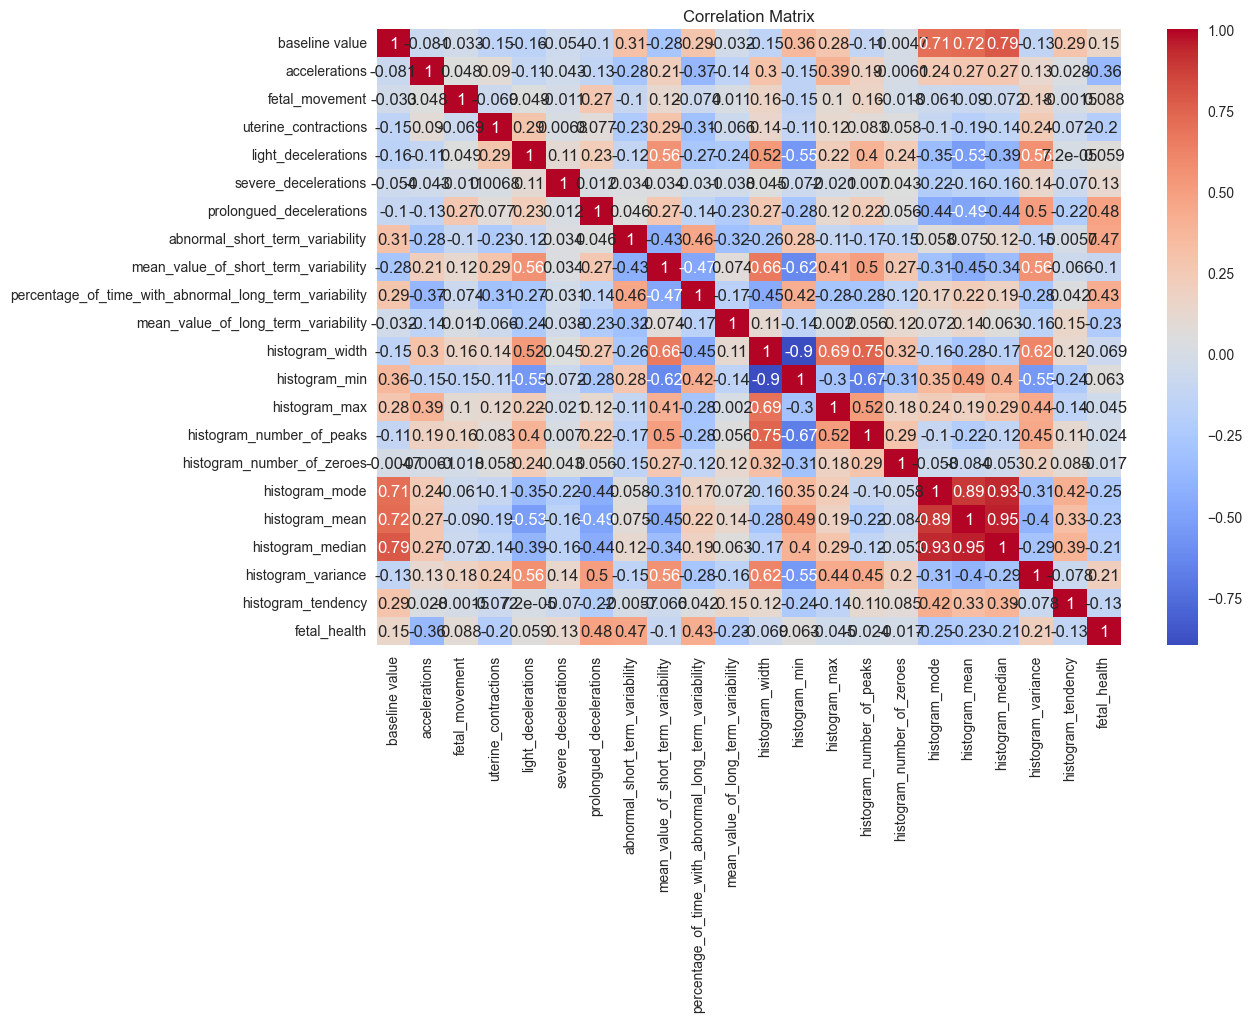

In [9]:
# **Exploratory Data Analysis (EDA)**
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

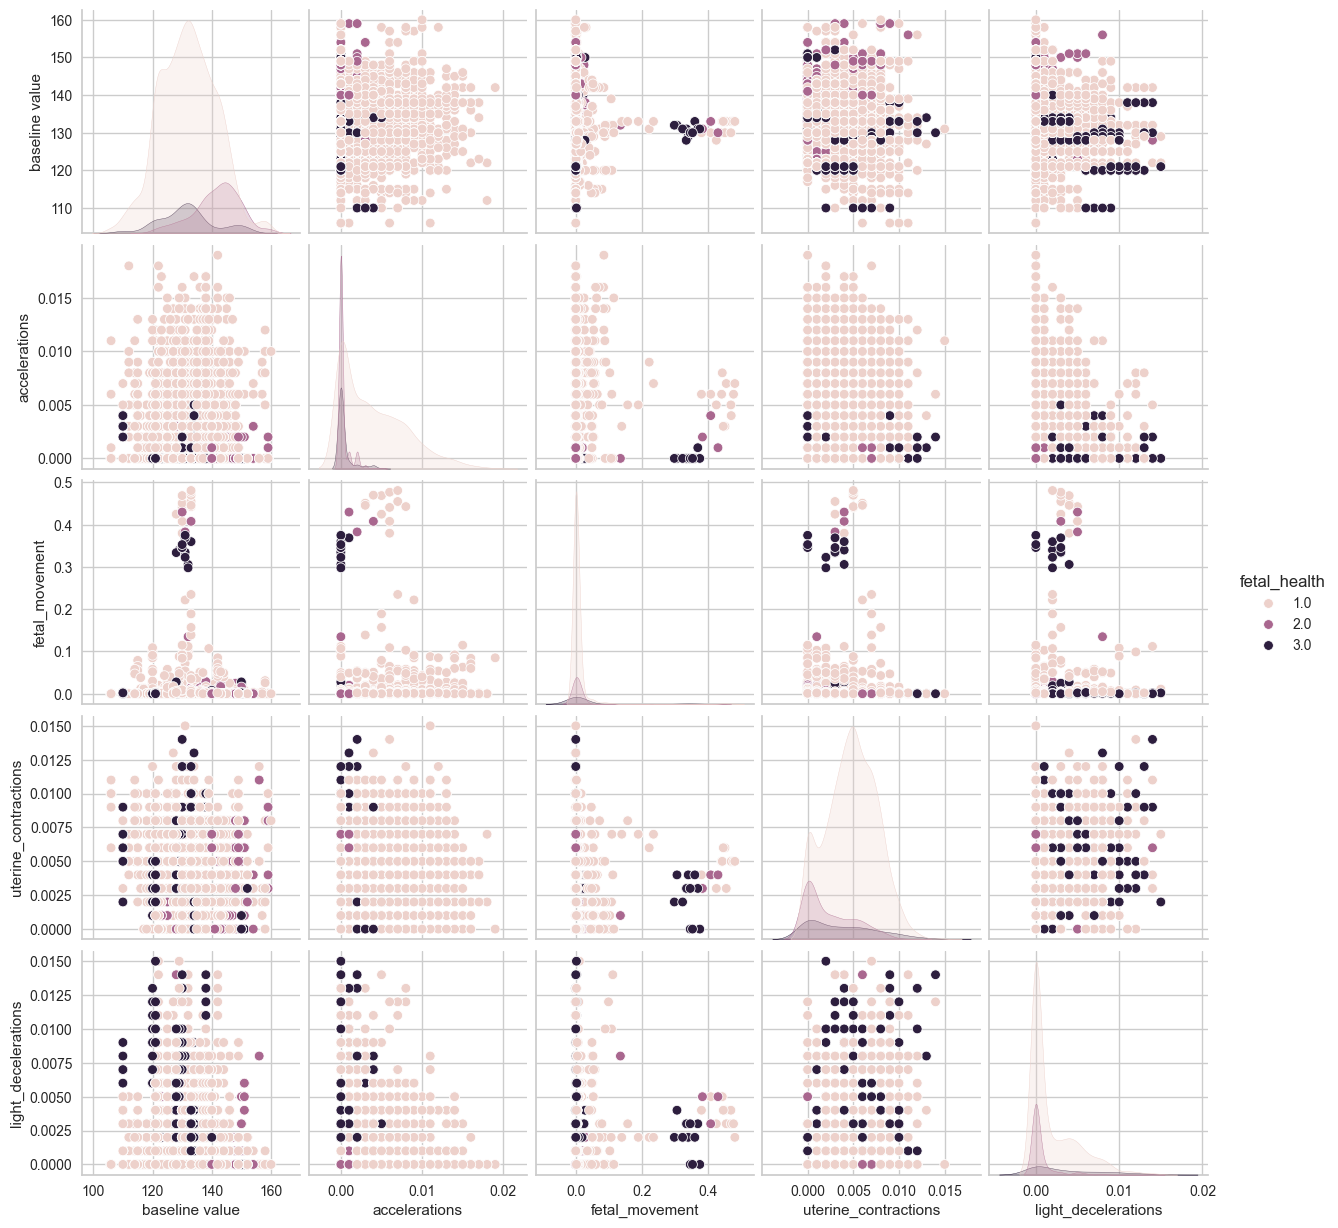

In [10]:
# Pairplot of selected features
sns.pairplot(data, hue='fetal_health', vars=data.columns[:5])  # Limit features for clarity
plt.show()

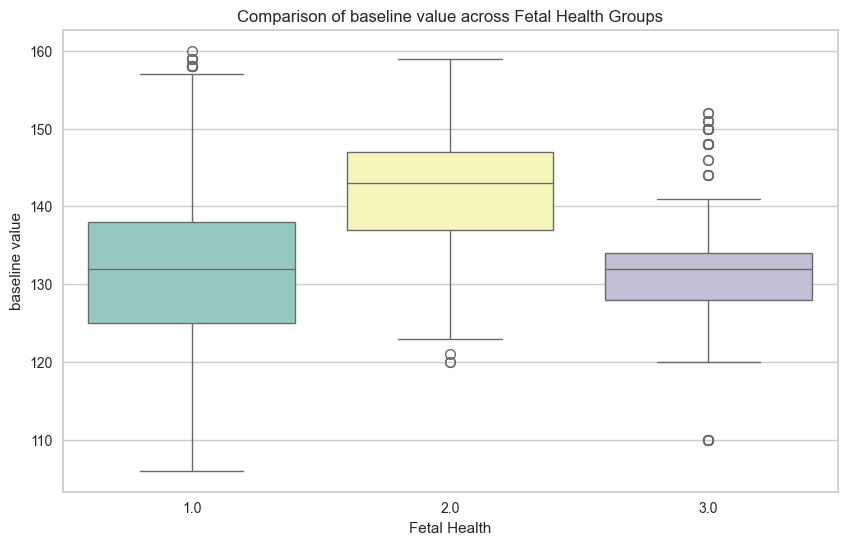

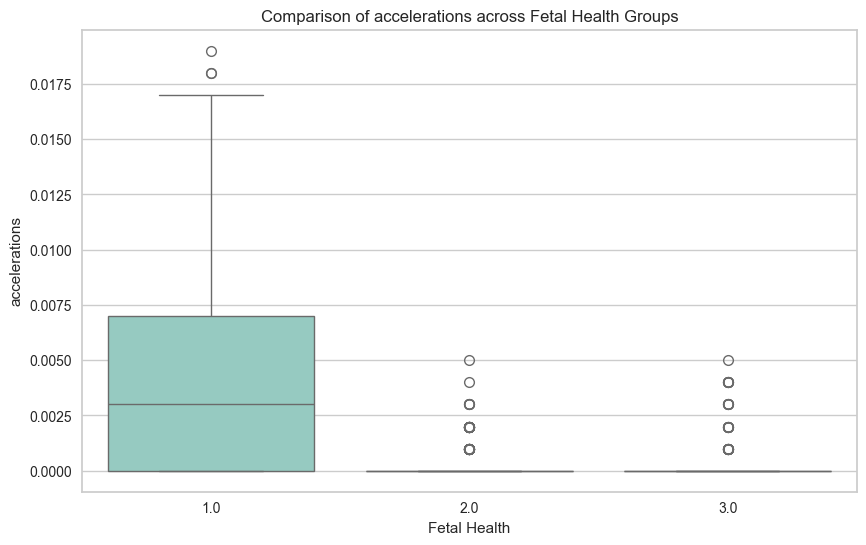

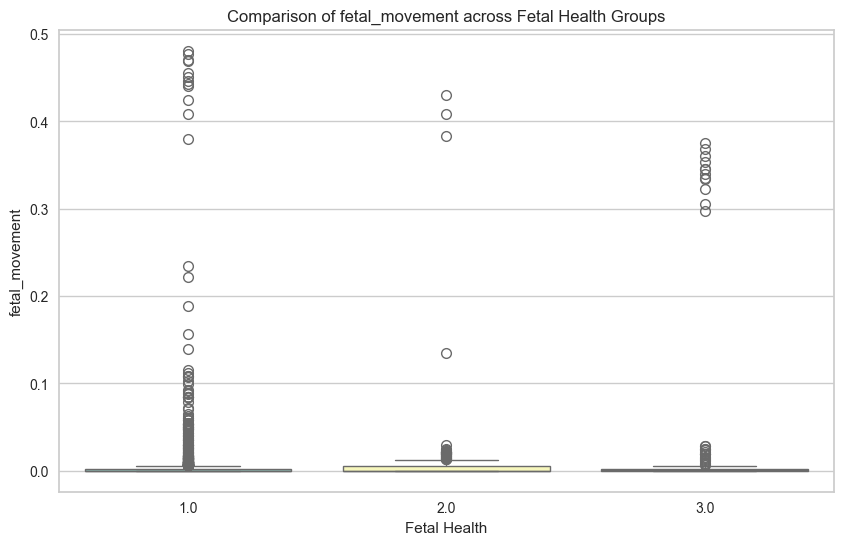

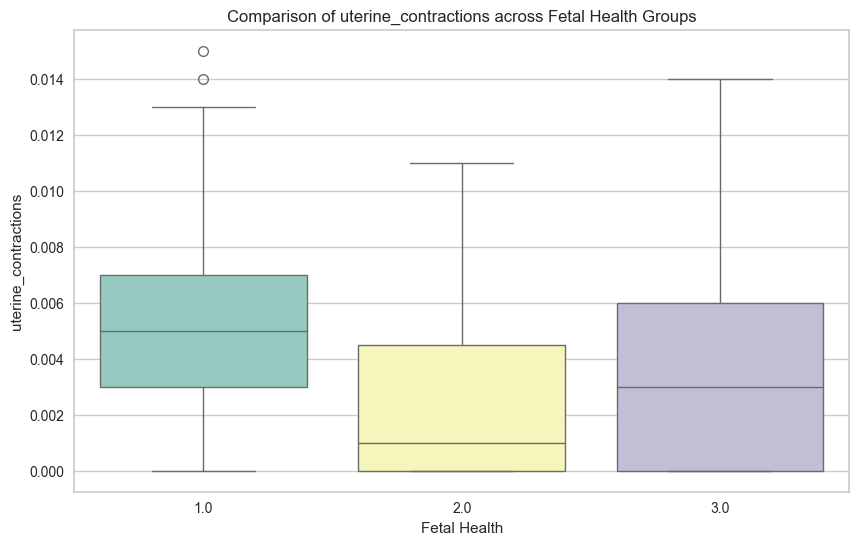

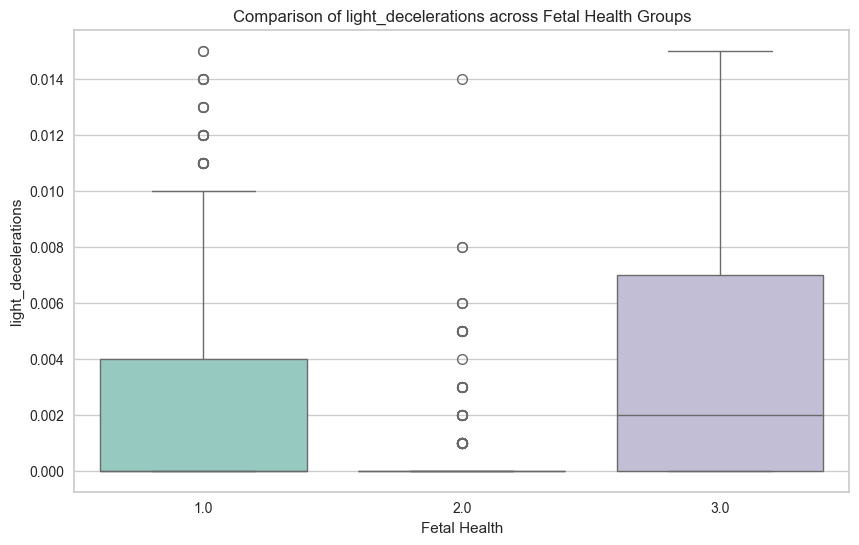

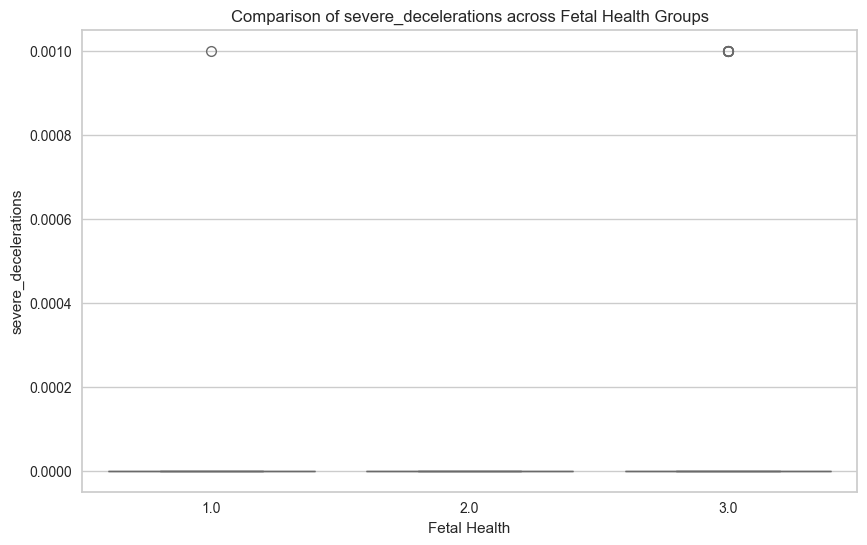

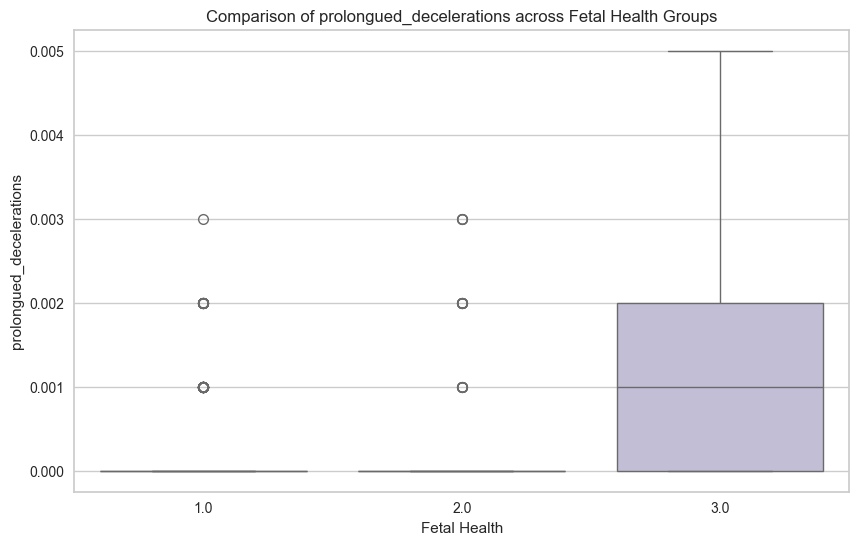

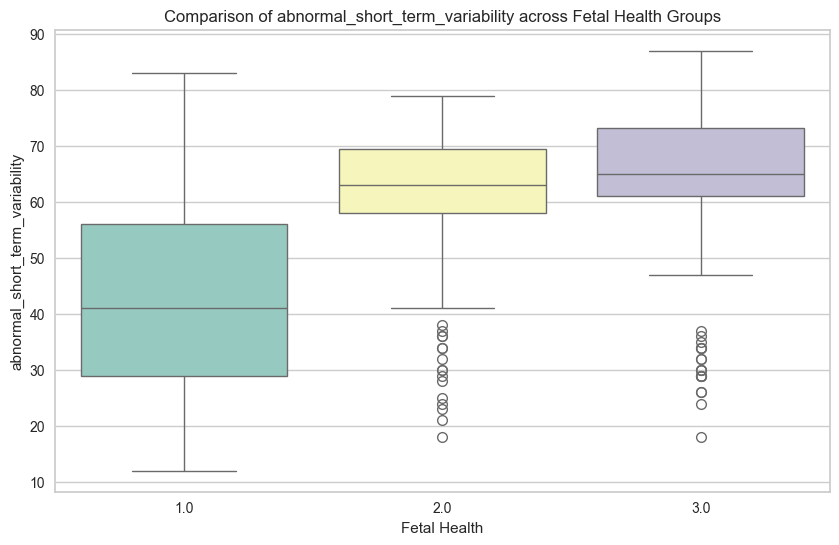

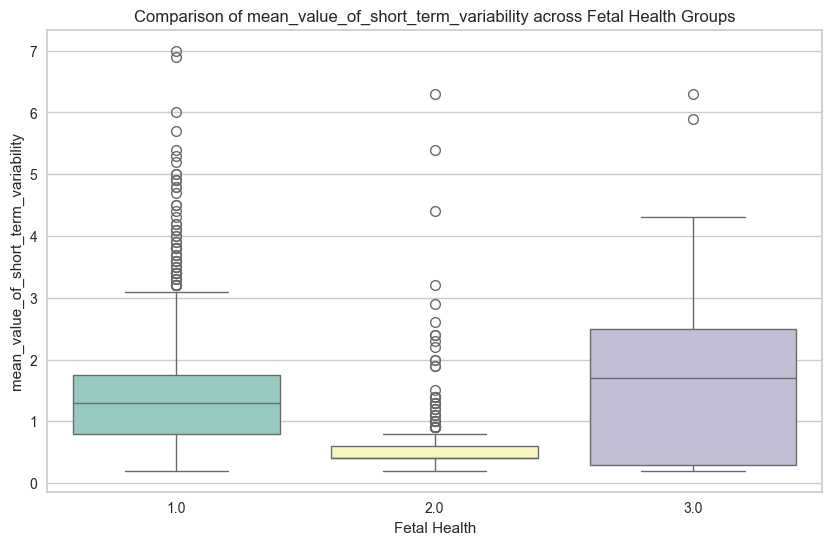

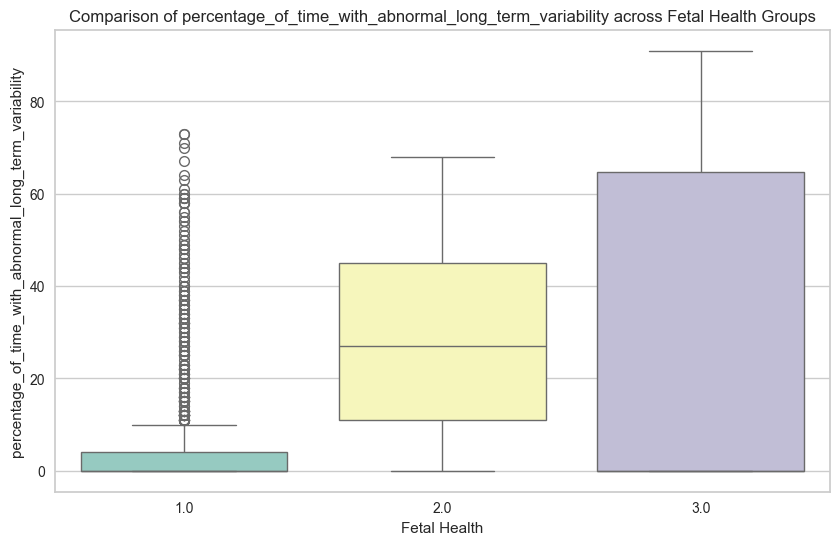

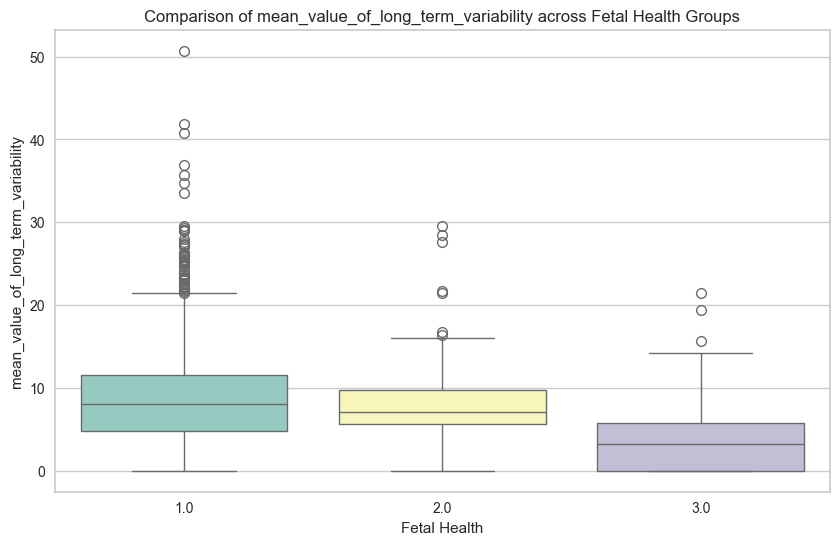

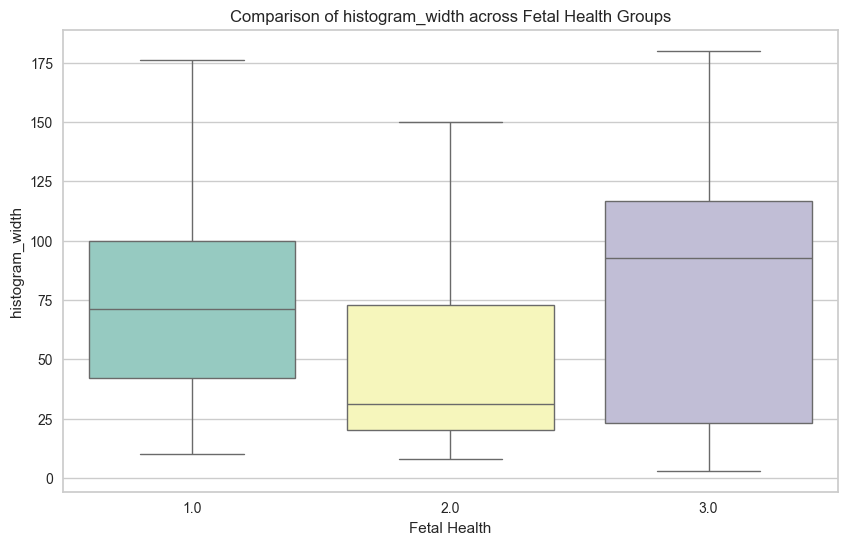

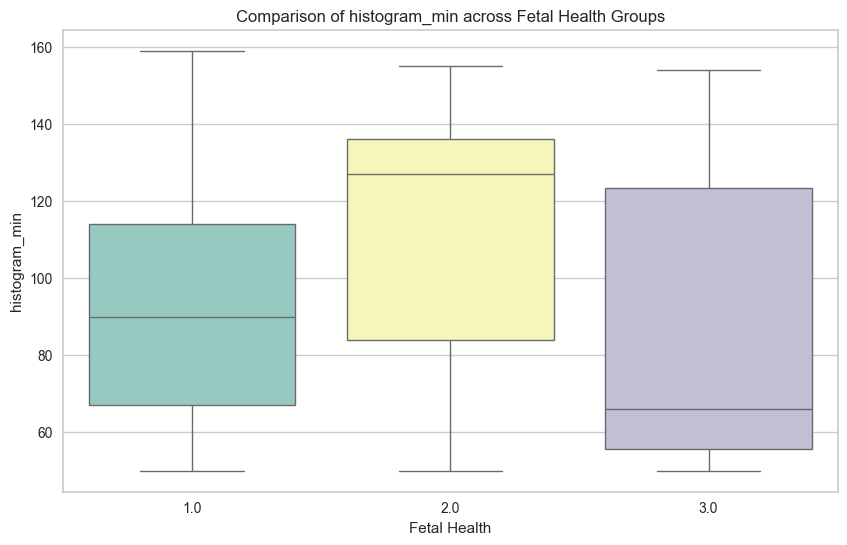

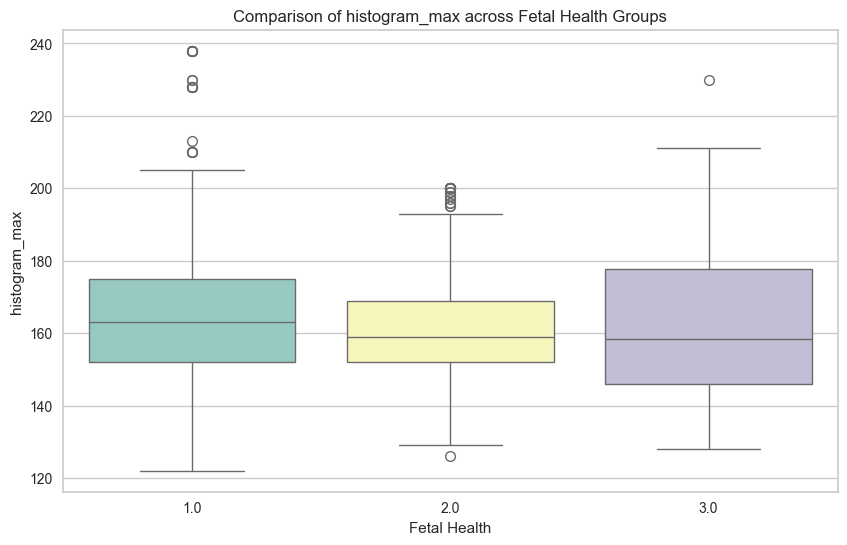

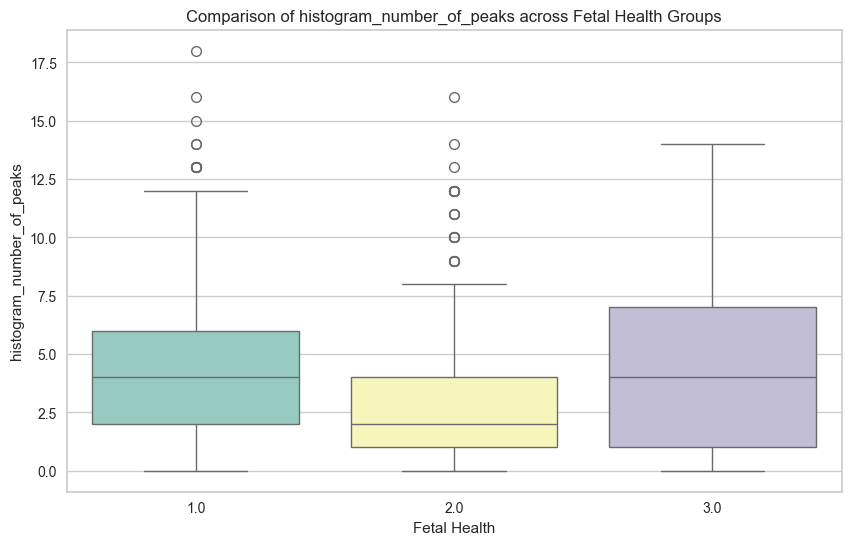

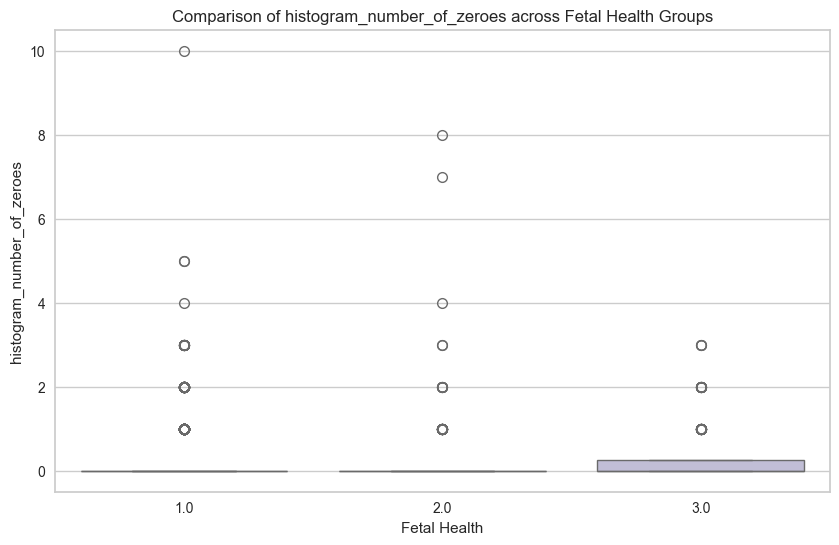

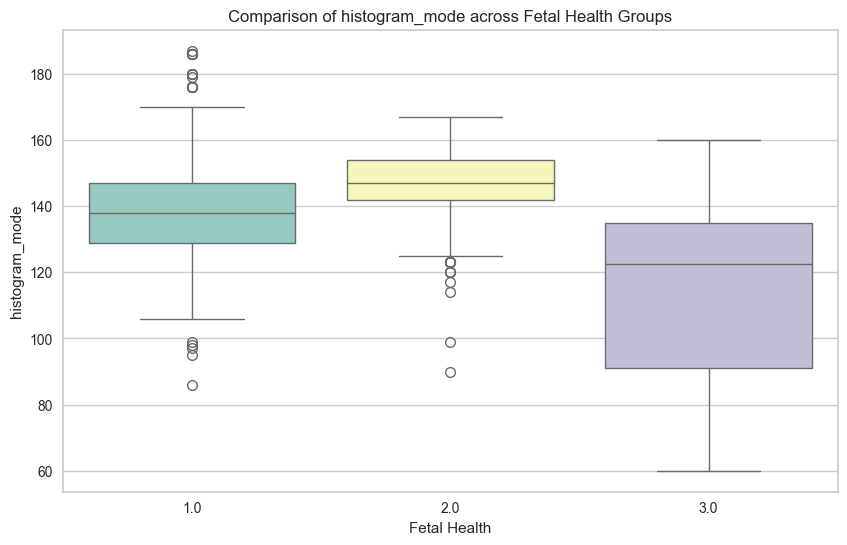

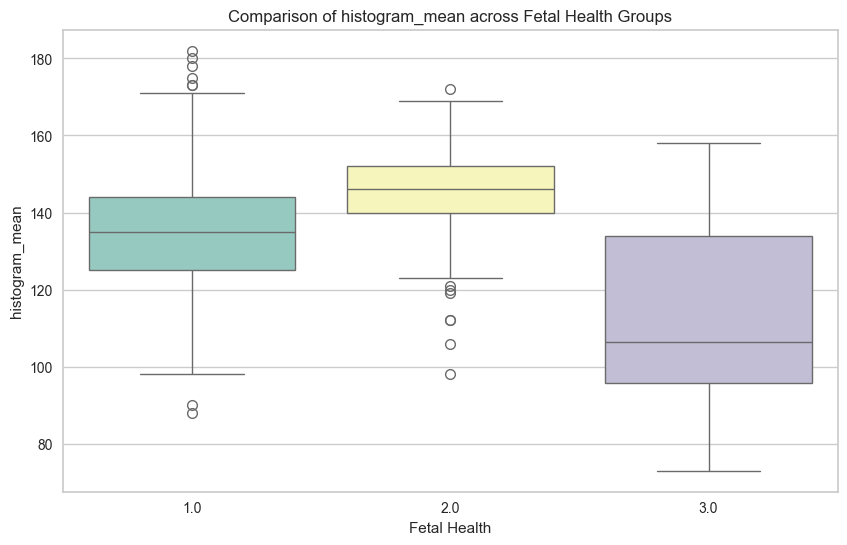

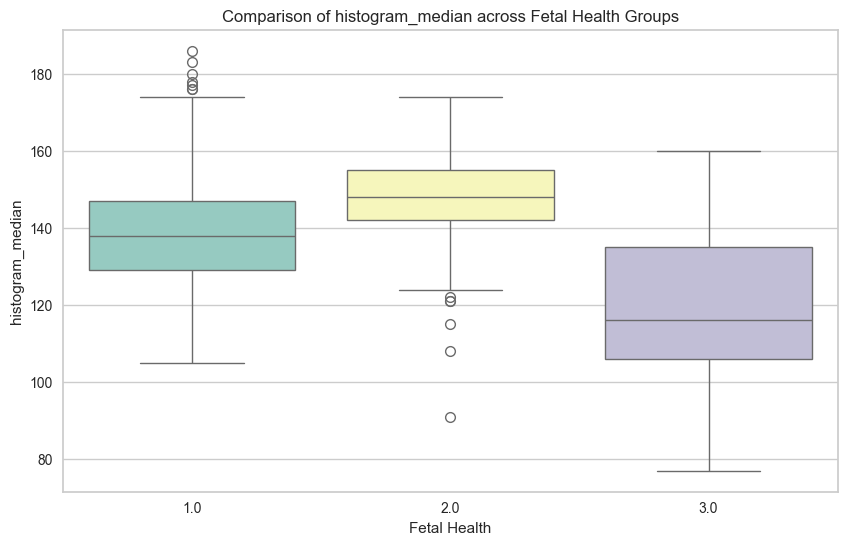

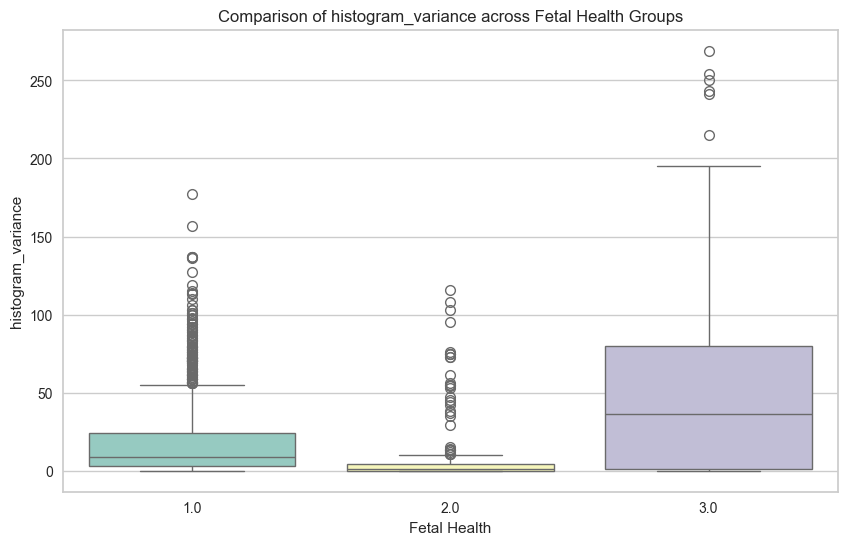

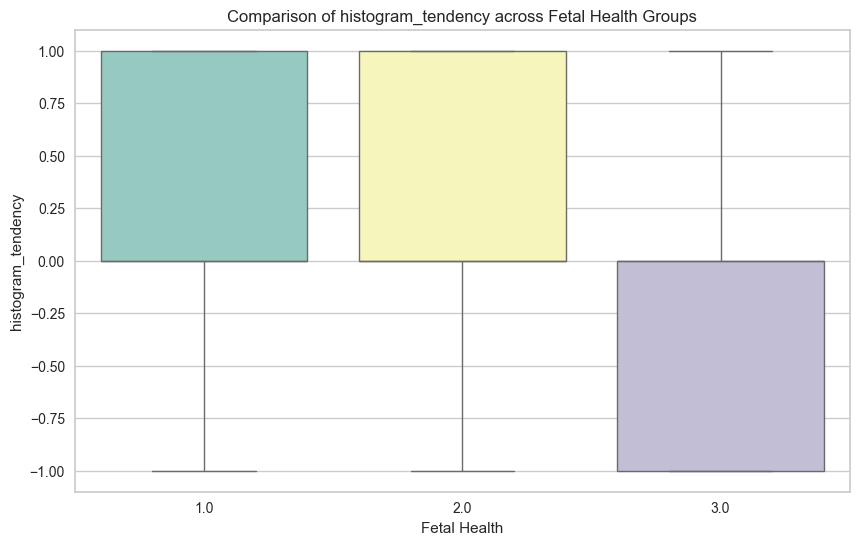

In [11]:
# Compare each variable based on fetal health group
features = data.columns[:-1]  # Exclude the target variable
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='fetal_health', y=feature, data=data, palette='Set3')
    plt.title(f'Comparison of {feature} across Fetal Health Groups')
    plt.xlabel('Fetal Health')
    plt.ylabel(feature)
    plt.show()

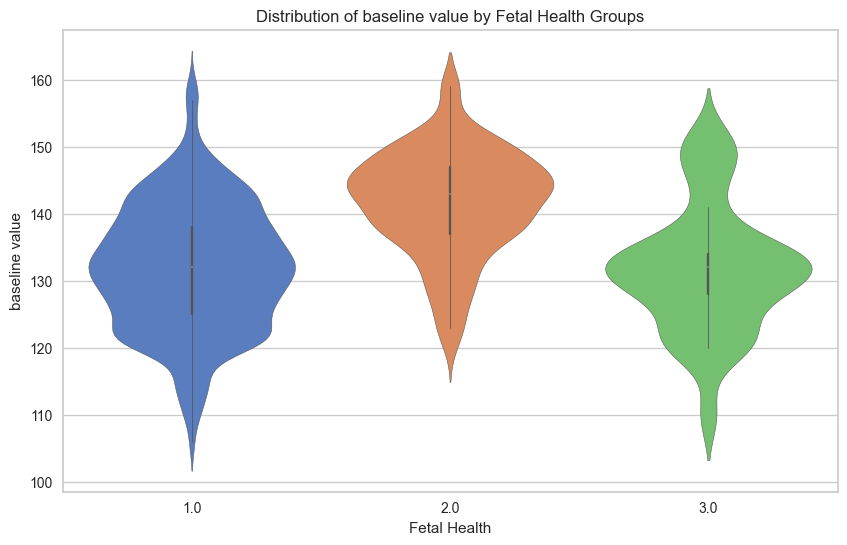

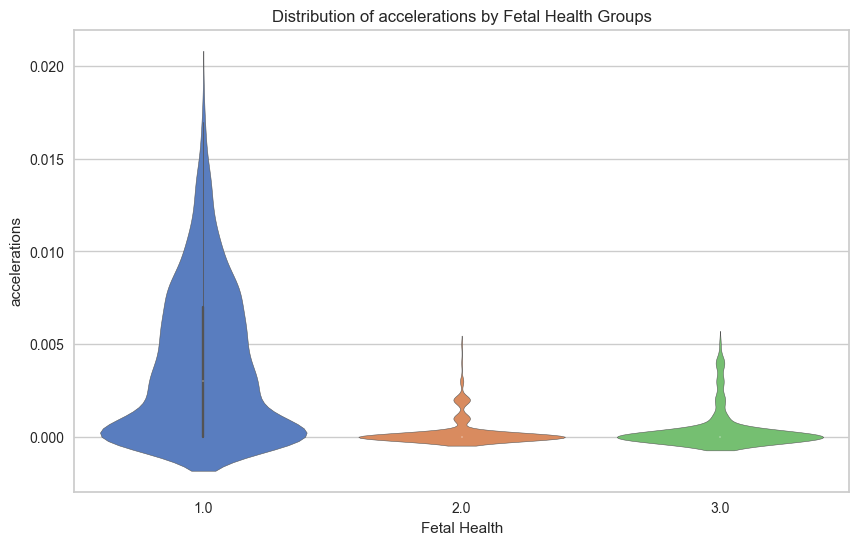

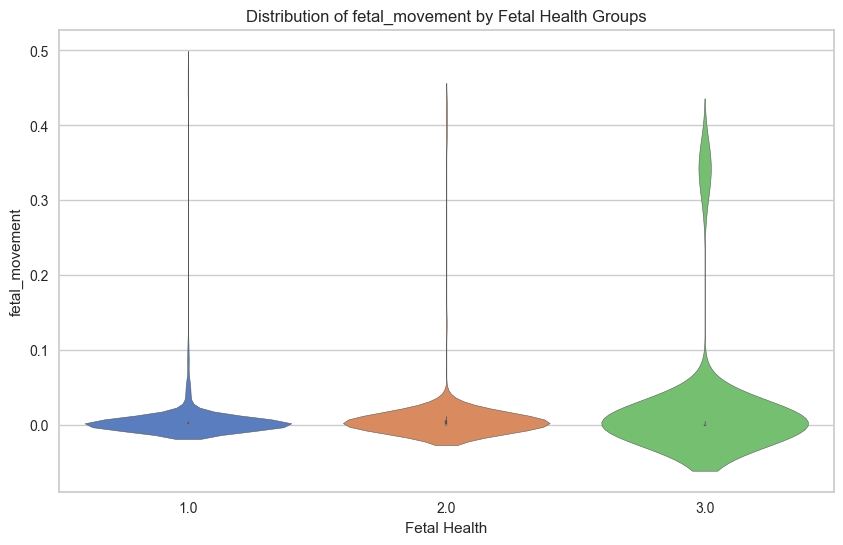

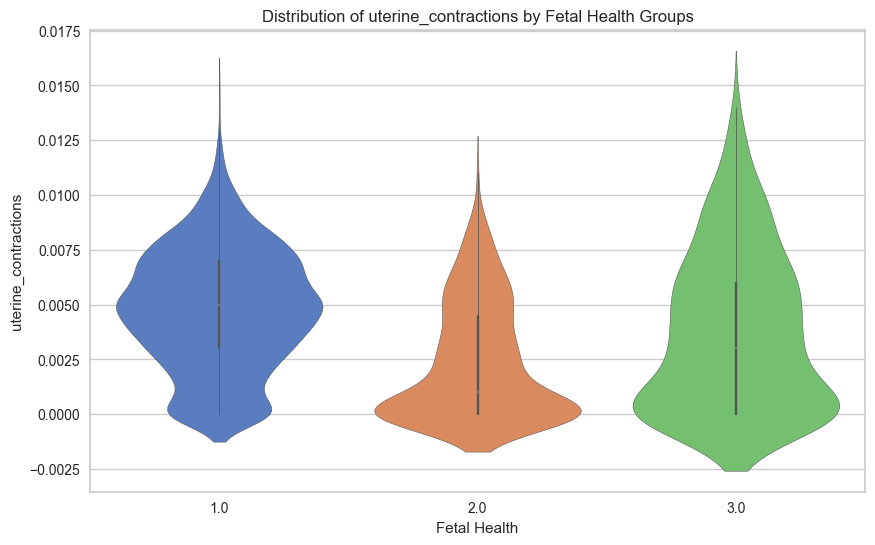

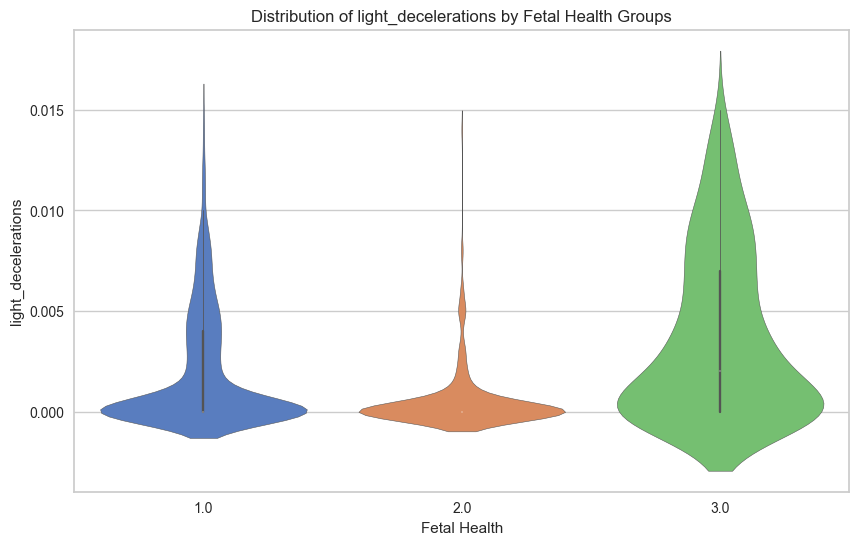

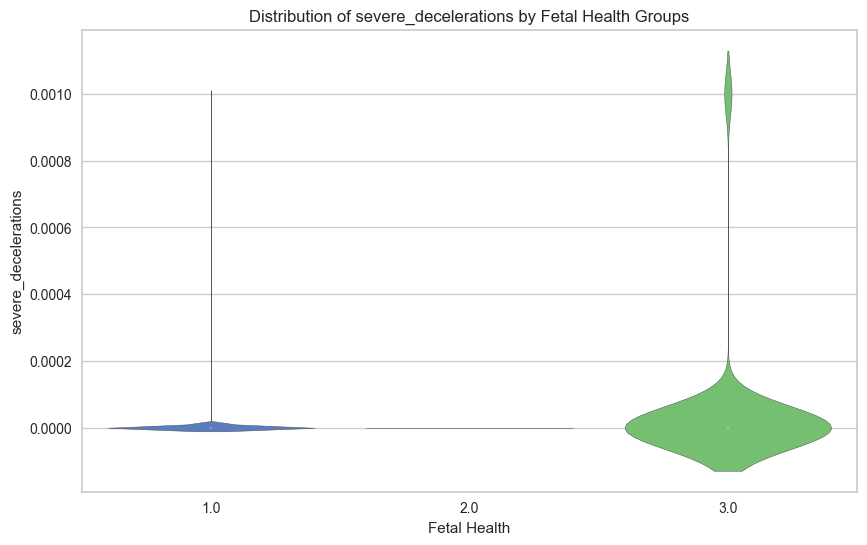

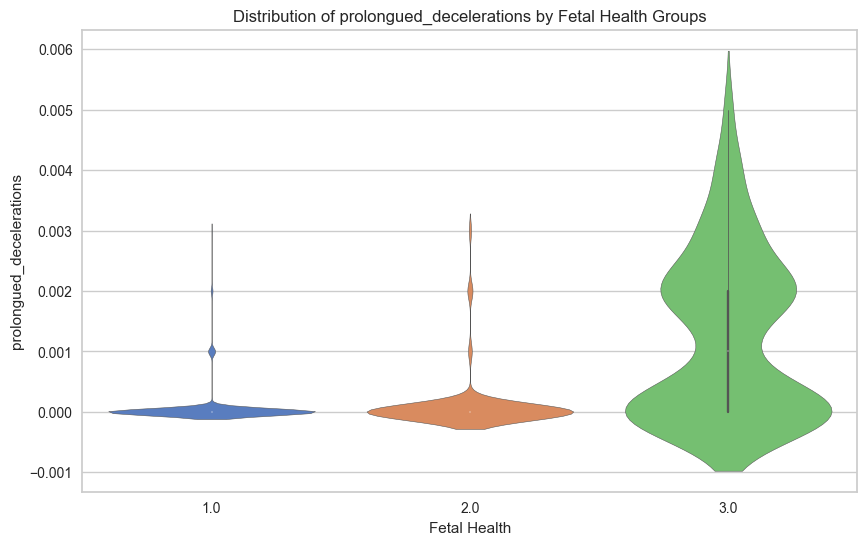

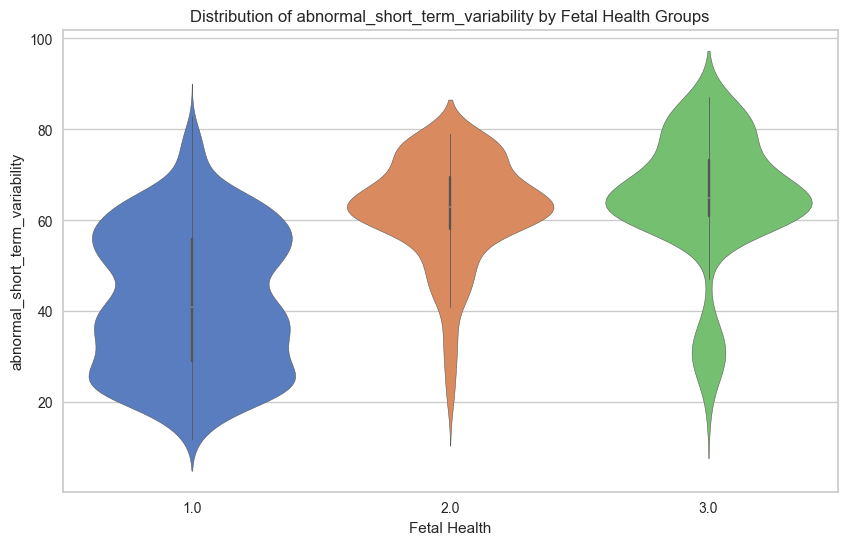

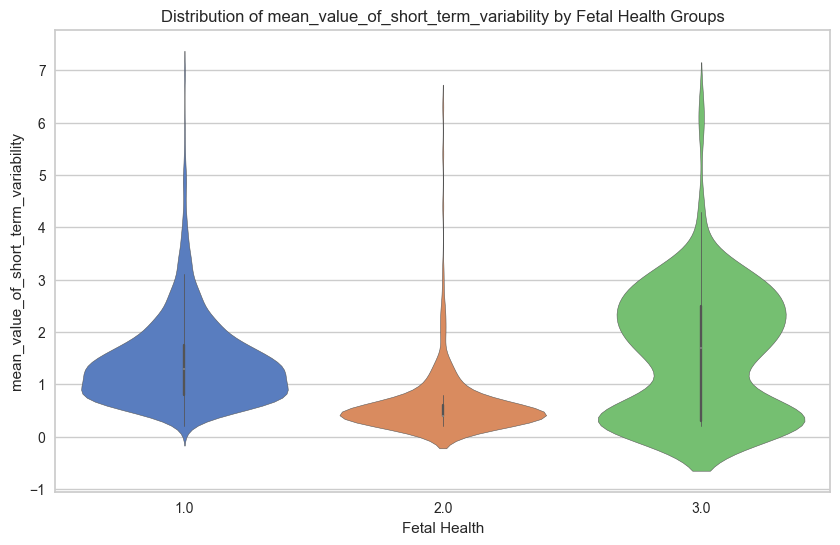

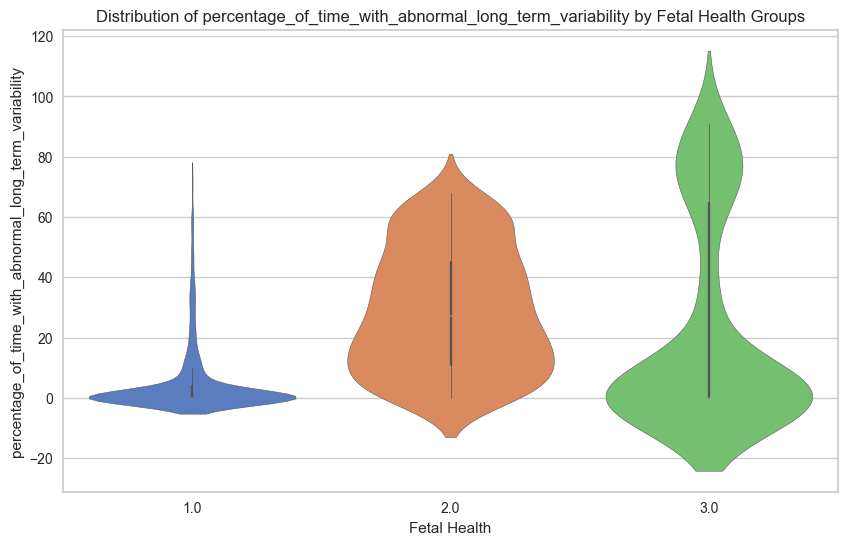

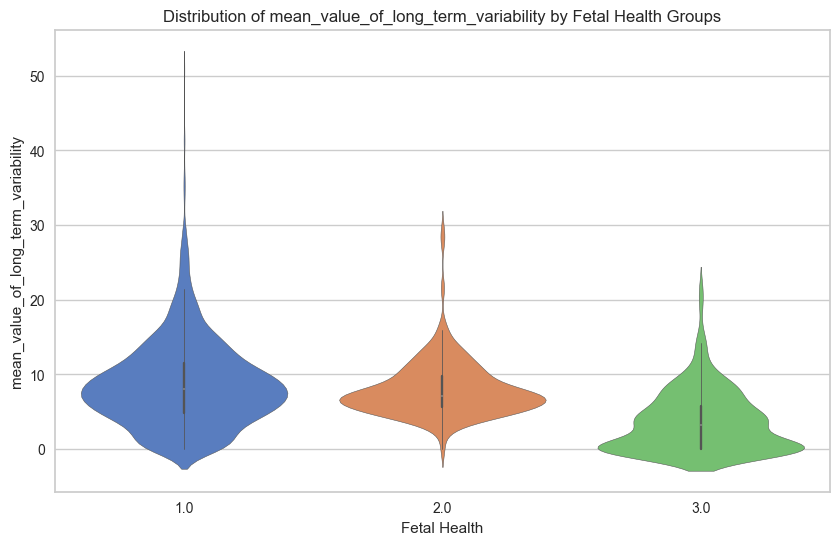

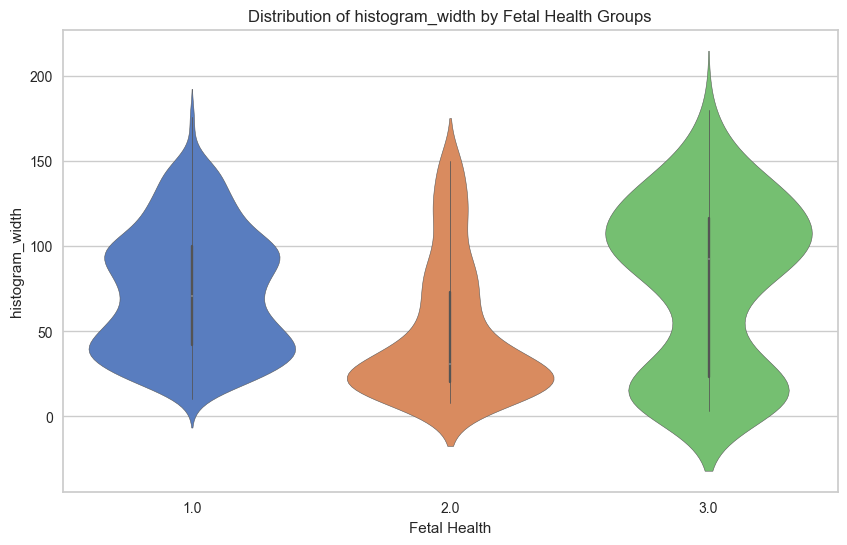

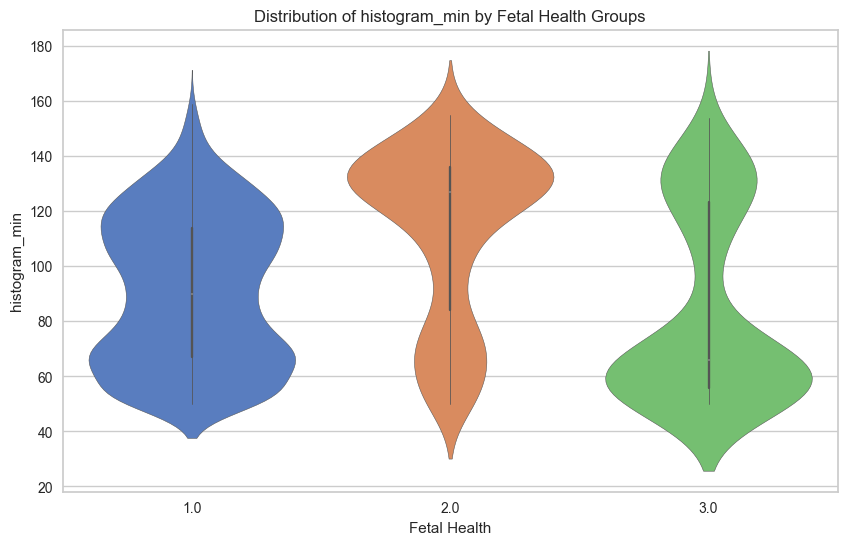

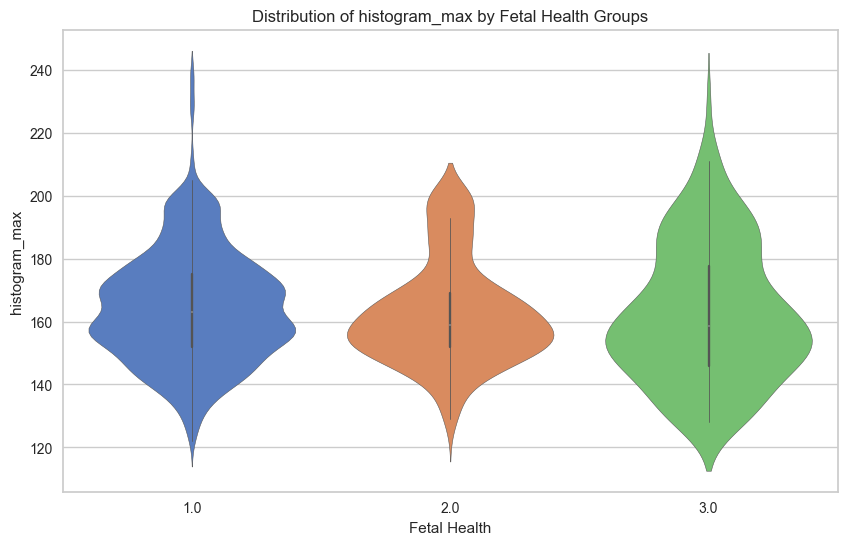

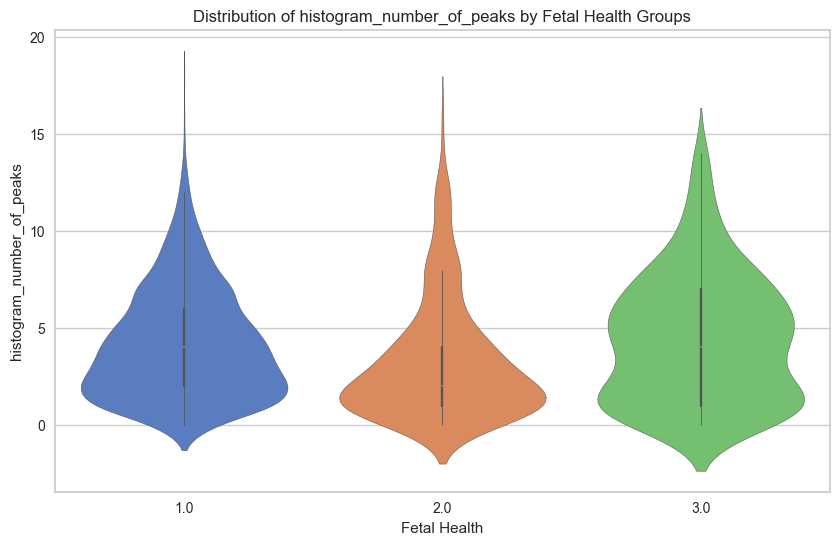

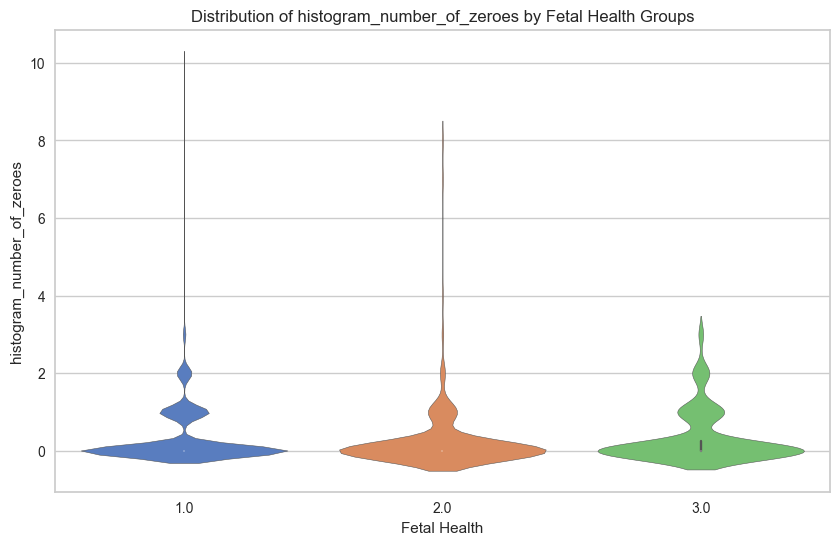

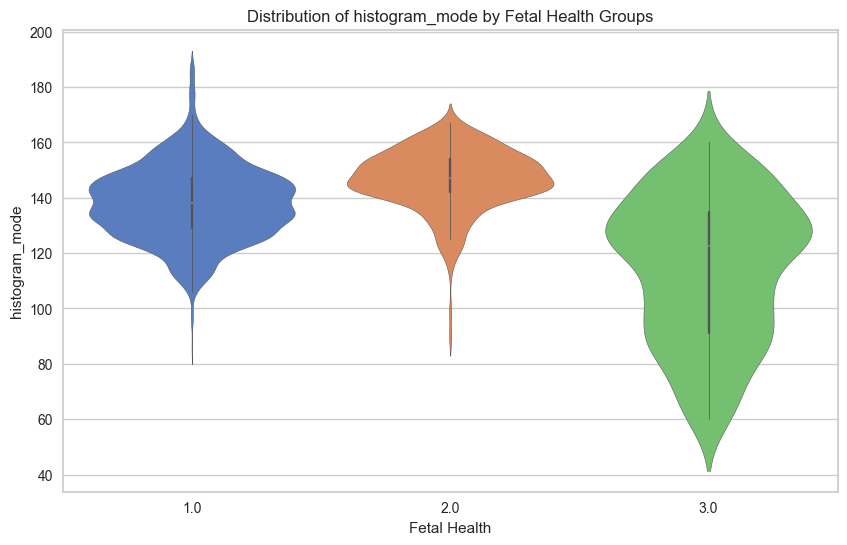

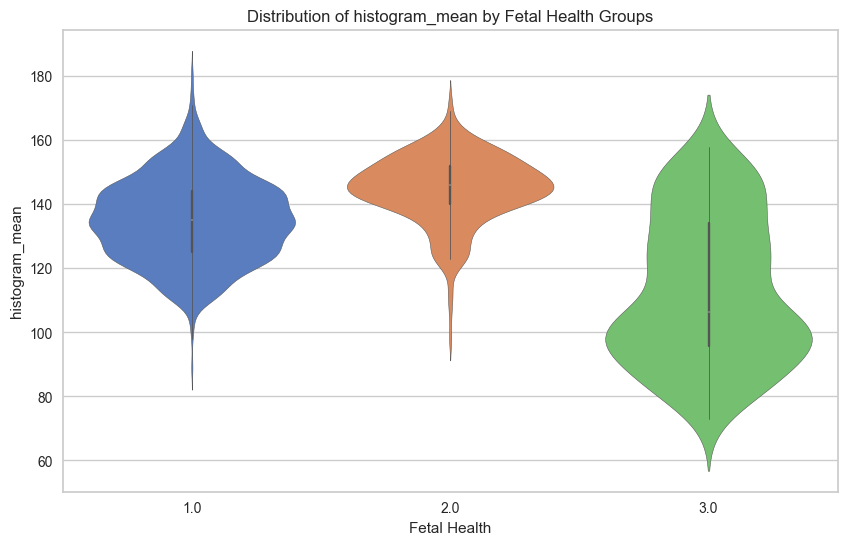

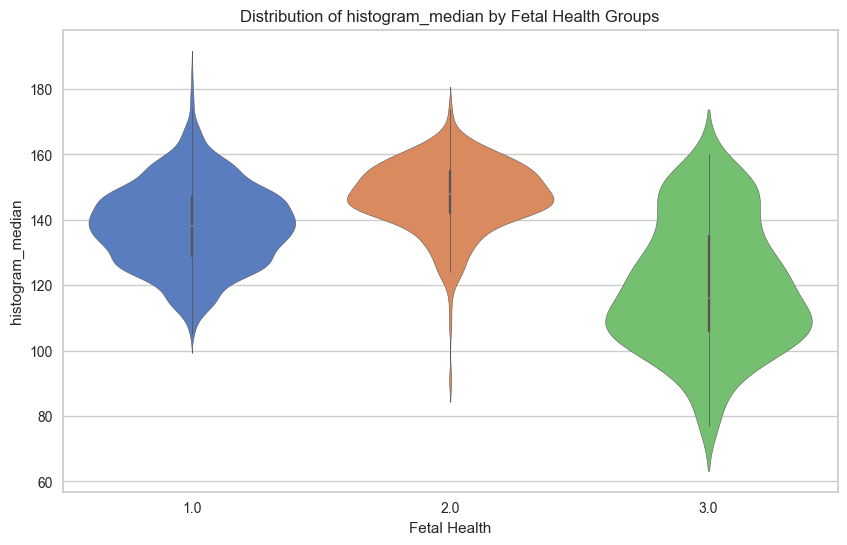

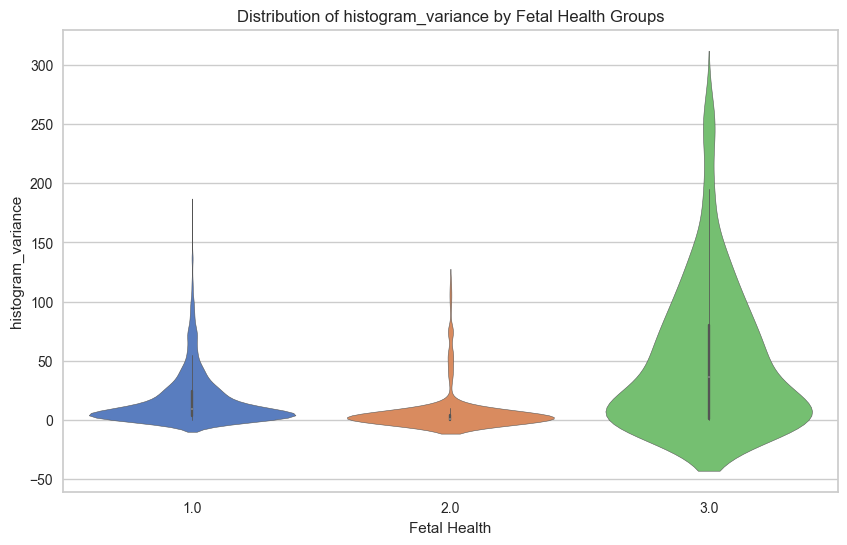

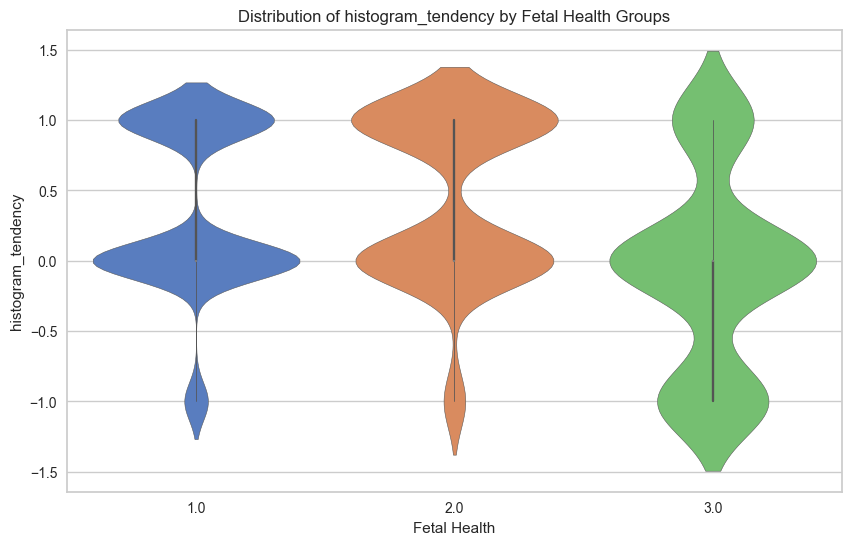

In [12]:
# Additional visualizations for categorical understanding (if any applicable)
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='fetal_health', y=feature, data=data, palette='muted')
    plt.title(f'Distribution of {feature} by Fetal Health Groups')
    plt.xlabel('Fetal Health')
    plt.ylabel(feature)
    plt.show()

In [13]:
# **Data Preprocessing**
# Split features and target
X = data.drop(columns=['fetal_health'])
y = data['fetal_health']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# from pycaret.classification import setup, compare_models

# clf_setup = setup(data=data, target='fetal_health', verbose=False)

In [15]:
# **Model Comparison using PyCaret**
# Combine the features and target into a single dataframe for PyCaret
model_data = pd.concat([X, y], axis=1)

# Initialize PyCaret setup
clf_setup = setup(data=model_data, target='fetal_health', verbose=False)

# Compare models
best_model = compare_models()

# Store results in a dataframe
results = pull()

# Display the results dataframe
print(results)

# Finalize the best model
final_model = finalize_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9530,0.9881,0.9530,0.9526,0.9519,0.8680,0.8696,2.2100
lightgbm,Light Gradient Boosting Machine,0.9523,0.9872,0.9523,0.9518,0.9514,0.8671,0.8682,0.3730
gbc,Gradient Boosting Classifier,0.9483,0.0000,0.9483,0.9481,0.9472,0.8555,0.8571,0.2940
xgboost,Extreme Gradient Boosting,0.9449,0.9874,0.9449,0.9443,0.9438,0.8467,0.8479,0.0690
rf,Random Forest Classifier,0.9362,0.9855,0.9362,0.9358,0.9338,0.8180,0.8215,0.0900
et,Extra Trees Classifier,0.9362,0.9820,0.9362,0.9347,0.9334,0.8171,0.8206,0.0710
dt,Decision Tree Classifier,0.9093,0.8847,0.9093,0.9131,0.9101,0.7566,0.7576,0.0140
knn,K Neighbors Classifier,0.8945,0.9232,0.8945,0.8907,0.8882,0.6881,0.6969,0.0310
lr,Logistic Regression,0.8824,0.0000,0.8824,0.8760,0.8750,0.6551,0.6623,0.4880
lda,Linear Discriminant Analysis,0.8817,0.0000,0.8817,0.8811,0.8779,0.6641,0.6680,0.0110


                                    Model  Accuracy     AUC  Recall   Prec.  \
catboost              CatBoost Classifier    0.9530  0.9881  0.9530  0.9526   
lightgbm  Light Gradient Boosting Machine    0.9523  0.9872  0.9523  0.9518   
gbc          Gradient Boosting Classifier    0.9483  0.0000  0.9483  0.9481   
xgboost         Extreme Gradient Boosting    0.9449  0.9874  0.9449  0.9443   
rf               Random Forest Classifier    0.9362  0.9855  0.9362  0.9358   
et                 Extra Trees Classifier    0.9362  0.9820  0.9362  0.9347   
dt               Decision Tree Classifier    0.9093  0.8847  0.9093  0.9131   
knn                K Neighbors Classifier    0.8945  0.9232  0.8945  0.8907   
lr                    Logistic Regression    0.8824  0.0000  0.8824  0.8760   
lda          Linear Discriminant Analysis    0.8817  0.0000  0.8817  0.8811   
ada                  Ada Boost Classifier    0.8690  0.0000  0.8690  0.8857   
ridge                    Ridge Classifier    0.8488 

In [16]:
final_model

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['baseline value', 'accelerations',
                                             'fetal_movement',
                                             'uterine_contractions',
                                             'light_decelerations',
                                             'severe_decelerations',
                                             'prolongued_deceleratio...
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='most_frequent'))),
                ('clean_column_names',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('actual_estimator',
                 <catboost.core.CatBoostClassifier object at 0x000002AFAACB5400>)],
         verbose=False)

In [23]:
# Evaluate the finalized model
# Convert X_test to DataFrame
X_test_df = pd.DataFrame(X_test, columns=data.drop(columns=['fetal_health']).columns)

# Evaluate the finalized model
predictions = predict_model(final_model, data=X_test_df)

In [24]:
predictions

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,prediction_label,prediction_score
0,-0.012861,-0.309366,0.002740,-0.479710,0.043451,-0.064301,-0.268148,-0.048467,-0.262589,-0.532648,...,0.008034,0.325555,-0.445313,0.101894,0.032698,0.008275,-0.338667,-0.516697,1,0.7952
1,-0.818907,-0.824976,-0.183561,1.558208,2.085854,-0.064301,-0.268148,0.878607,0.421201,-0.532648,...,-1.340946,0.325555,-0.445313,-0.439607,-1.175712,-0.879481,0.352324,1.119029,1,0.7549
2,-0.214373,0.206244,-0.142161,-0.140057,1.064653,-0.064301,1.383487,0.762723,0.877061,-0.532648,...,0.232864,1.346042,-0.445313,-0.259107,-0.476106,-0.401458,0.075928,-0.516697,1,0.8152
3,-0.214373,2.010878,-0.204261,0.199596,-0.637350,-0.064301,-0.268148,-1.033483,-0.034659,-0.532648,...,0.401487,1.346042,-0.445313,0.342562,0.668704,0.486297,-0.338667,1.119029,1,0.9858
4,-0.818907,-0.824976,-0.204261,1.218555,1.745453,-0.064301,1.383487,0.994492,-0.034659,-0.532648,...,-0.497833,-0.014607,-0.445313,-1.402276,-1.493715,-1.630658,-0.407766,-0.516697,1,0.3672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,1.196208,-0.824976,0.230441,-1.498669,-0.637350,-0.064301,-0.268148,1.573913,-1.174309,1.123455,...,1.188392,-0.694931,-0.445313,0.462895,0.605103,0.554586,-0.615063,-2.152424,1,0.6768
422,-0.214373,-0.824976,-0.204261,0.199596,2.085854,-0.064301,-0.268148,-0.859657,0.535166,-0.201428,...,-0.441626,-0.354769,0.999405,-0.138773,-0.921310,-0.333169,1.768856,1.119029,1,0.7108
423,1.095452,0.721854,-0.100761,-0.819363,-0.637350,-0.064301,-0.268148,-0.801715,0.421201,-0.532648,...,0.570110,0.325555,0.999405,0.763729,0.923106,0.896031,-0.304117,1.119029,1,0.9652
424,0.289406,-0.824976,-0.142161,1.218555,-0.296949,-0.064301,-0.268148,1.168318,0.991026,-0.532648,...,-1.059909,-0.354769,-0.445313,-0.259107,-0.221704,-0.128303,-0.580514,1.119029,1,0.8467


In [25]:
# Evaluate the finalized model
# Convert X_test to DataFrame
X_test_df = pd.DataFrame(X_test, columns=data.drop(columns=['fetal_health']).columns)

# Evaluate the finalized model
predictions = predict_model(final_model, data=X_test_df)

# Inspect columns
print(predictions.columns)

# Replace 'Label' with the correct column name if necessary
print("Classification Report:")
print(classification_report(y_test, predictions['prediction_label']))  # Adjust 'Label' if it is different.

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'prediction_label', 'prediction_score'],
      dtype='object')
Classification Report:
              precision    recall  f1-score   support

         1.0       0.81      0.97      0.89       333
         2.0       0.33      0.06      0.11        64
         3.0       0.73      0.38      0.50        29

    accuracy                           0.80       426
   macro avg       0.63      0.47   

Confusion Matrix:


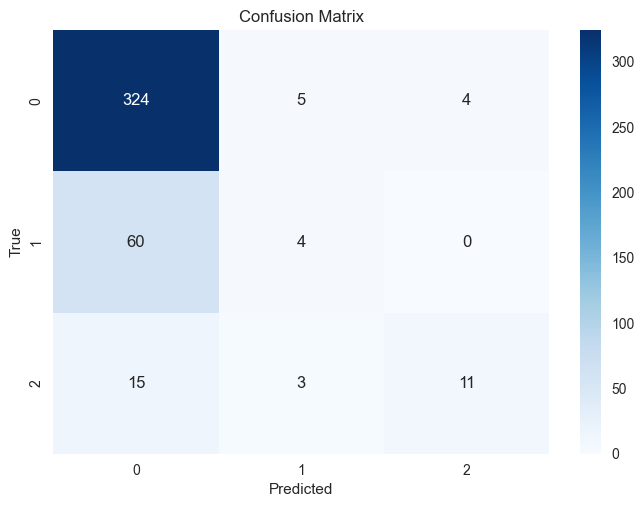

In [26]:
# **Evaluation Metrics**

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, predictions['prediction_label'])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

 **Conclusion**

PyCaret allowed us to quickly compare multiple machine learning models and identify the best-performing one for this dataset. Further optimization and feature engineering could enhance the model's predictive power. This analysis highlights the critical indicators of fetal health and provides a framework for future studies or applications.
